# Logistic Regression

## Logistic Regression

We are going train a binary classifier using the Logistic Regression model: $f_w(\textbf{x}) = \frac{1}{1+e^{-w^\intercal \textbf{x}}}$

For this we need to fit the parameters $w$ to our dataset by minimizing the cost function $J$:

$\hat{w} = \underset{w}{\text{minimize}} (J) = \underset{w}{\text{minimize}} {1 \over m} \sum_{i=1}^m{-y^{(i)}\log(f_w(x^{(i)}) - (1-y^{(i)})\log(1-f_w(x^{(i)})}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in the training set.

We are going to use the Gradient Descent algorithm to solve this minimization problem, in pseudo-code:

repeat until convergence (or max. number of iterations) 

{

$w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$ (for all j)

}

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by:

$\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

Notice that the partial derivative of our cost function has the same form as for the Linear Regression cost function, however the difference is in the term $f_w(\textbf{x})$, our model. In the case of Logistic Regression $f_w(\textbf{x})$ is the sigmoid function of $w^\intercal \textbf{x}$.

Thus, the Python code of our **GradientDescent** function is going to be quite the same as for Linear Regression, but calling the **sigmoid** function to evaluate the Logistic Regression model $f_w(\textbf{x})$.

In [58]:
import numpy as np

def sigmoid(X):
    """
    Función sigmoide robusta, evitando overflow en cálculos de np.exp().
    """
    X = np.asarray(X, dtype=np.float64)  # Aseguramos que los datos sean tipo float64
    result = np.zeros_like(X)  # Preparamos el array de salida con el mismo tamaño que X

    # Caso X >= 0
    positive_mask = X >= 0
    result[positive_mask] = 1 / (1 + np.exp(-X[positive_mask]))

    # Caso X < 0
    negative_mask = X < 0
    exp_X = np.exp(X[negative_mask])  # Evitamos np.exp(-X) para valores negativos grandes
    result[negative_mask] = exp_X / (1 + exp_X)

    return result

def GradientDescent_logistic(X,y,max_iterations=10000, alpha=0.1, epsilon = 0.000001):
    m, n = X.shape # number of samples, number of features
    J = []

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations or until we have converged
    for iteration in range(max_iterations):
        h = sigmoid(np.dot(X, w))
        error = (h-y)
        gradient = np.dot(X.T , error) / m
        w = w - alpha*gradient
        
        J.append( sum(-y*np.log(h)-(1-y)*np.log(1-h)) / m )
        
        if (iteration > 1) and (J[-2] - J[-1]) < epsilon:
            print("Converged after {} iterations".format(iteration))
            break
            
    return [w, J]

def classifyVector(X, w):
    prob = sigmoid(sum(np.dot(X, w)))
    if prob > 0.5: return 1.0
    else: return 0.0

Let's see how to use this code in a synthetic dataset. First load the data and plot it.

In [7]:
# Load the synthetic dataset
import pickle

with open('./P5data_linear.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(100, 2)
(100,)


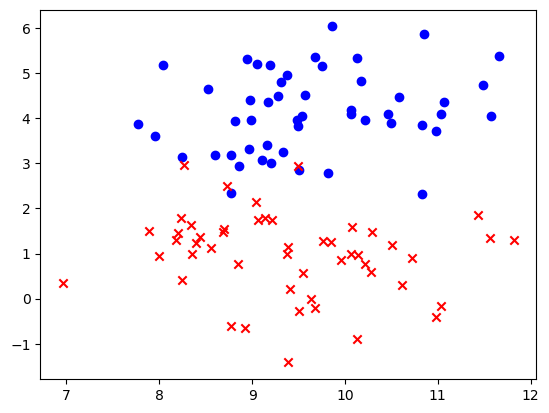

In [9]:
# Plot the data

%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

Now, we train the Logistic Regression classifier and draw its decision boundary in a 2D plot.

In [12]:
# Append the x0 column (for the bias term w0)
m, n = X.shape # m is the number of samples and n is the number of features
ones = np.ones(shape=(m, 1))
Xaugmented = np.hstack( (ones, X) )

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(Xaugmented, y)

#Evaluate the classifier accuracy in the training data
H = [classifyVector(Xaugmented[i,:],w) for i in range(X.shape[0])]
print ("Training Accuracy :", np.sum(H == y) / m)

Converged after 5271 iterations
Training Accuracy : 0.95


Next we will define a function to plot the decision boundary, along with data, given a set of weights. You can accept this function as is.

In [15]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary(X, y, w):    
    #Plot data
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):            
            z[i, j] = sigmoid(np.dot(np.array([1, u[i], v[j]]), w).item())


    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()

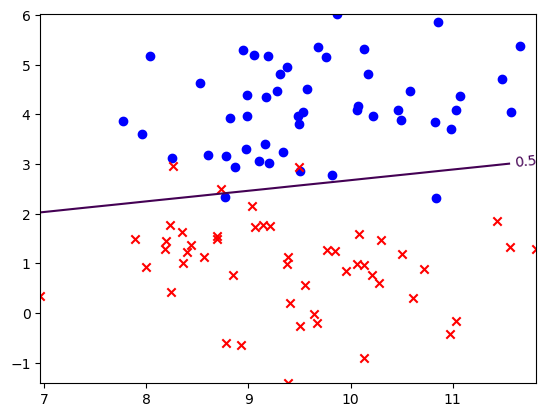

In [17]:
plotDecisionBoundary(X, y, w)

As can be seen in the previous plot the classification boundary with 2 features fits very poorly our data. That does not mean that the gradient descent has not converged, but the best possible solution using a line is not good at all. Check that the learning process has actually converged:

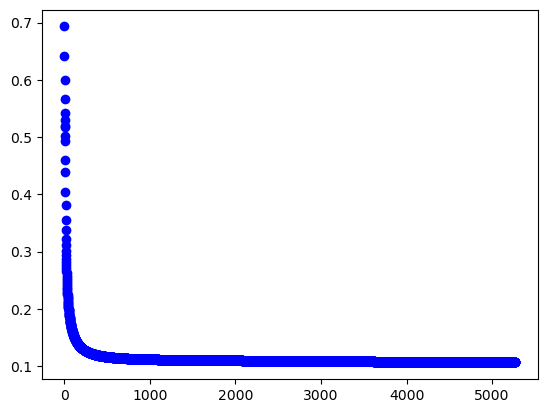

In [20]:
plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

## Non-Linear Decision Boundaries

In [23]:
# Load the synthetic dataset
import pickle

with open('P5data_nonLinear.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(117, 2)
(117,)


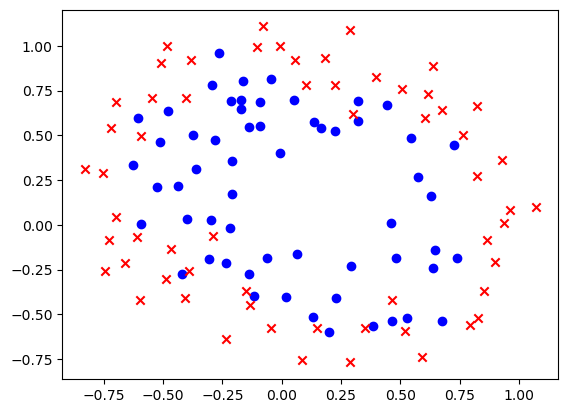

In [25]:
# Plot the data
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

Now we train a Logistic Regression classifier and draw its decision boundary over this new data.

In [27]:
# Append the x0 column (for the bias term w0)
m, n = X.shape # m is the number of samples and n is the number of features
ones = np.ones(shape=(m, 1))
Xaugmented = np.hstack( (ones, X) )

w, J = GradientDescent_logistic(Xaugmented, y)

#Evaluate the classifier accuracy in the training data
H = [classifyVector(Xaugmented[i,:],w) for i in range(m)]
print ("Training Accuracy :", np.sum(H == y) / m)

Converged after 273 iterations
Training Accuracy : 0.5299145299145299


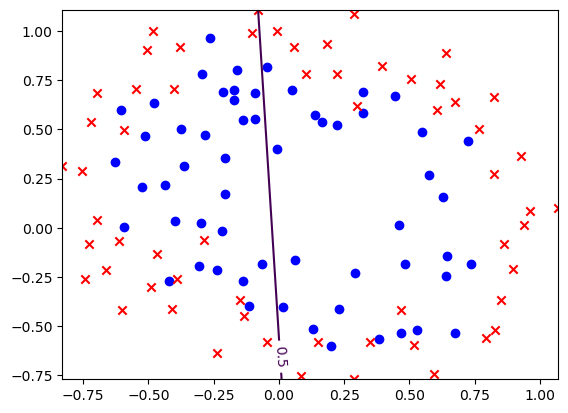

In [30]:
plotDecisionBoundary(X, y, w)

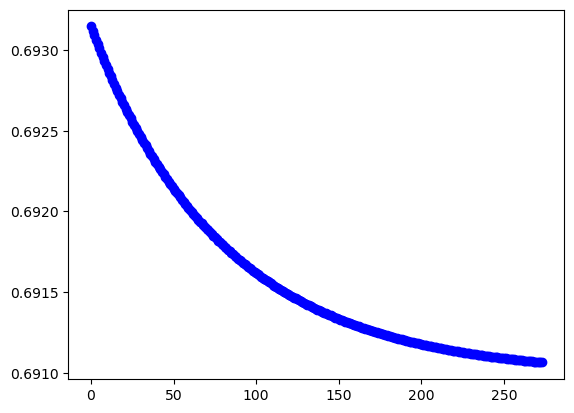

In [32]:
plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

---

In this case, a linear classifier does not separate the data correctly. The gradient descent process does converge (it finds the best solution possible), but the best solution possible here is not really good at all...

---

One way to fit the data better is to create more features from each data point. For example, if we map the original features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power we would get:

$MapFeature(x_1,x_2) = [1, x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3, \dots , x_1x_2^5, x_2^6]$

As a result of this mapping, our vector of two features is transformed into a 28-D vector (28 . The Logistic Regression classifier trained on this high dimensional feature space will have a more complex decision boundary (i.e. more degrees of freedom) and will appear nonlinear when drawn in the 2D plot.

To make our life easier, we will make a function to do this mapping of features. Note also that before we can use these new features, we should normalise them. It seems like a good idea to include the normalisation into the same function.

Moreover since at the time of applying our model to new data we would need to normalise any such new data IN THE SAME WAY as the training data we used, it is wise to keep track of the means and sigmas we used for normalising. Therefore, we will return the means and sigmas from the function as well.

Then in the future we could ask the function to use these same means and sigmas for normalisation (instead of calculating them anew), by passing them as arguments. A clever way to do this would be to allow the function to take an array of means and an array of sigmas as arguments. If we do give some values for these, then the function will use these values. If not (so the default empty vector will be given) then the function would calculate these arrays from the data.

Below is the function that does just that. 

In [37]:
def mapFeatureAndNormalise_AllQuadTerms(x1, x2, degree = 6, preCalcMeans = None, preCalcStd = None):
   
    
    x1 = x1.reshape(-1, 1) # make it into a column vector
    x2 = x2.reshape(-1, 1) # make it into a column vector

    DesignMatrix = np.ones_like(x1) # start with a column of ones
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            c = (x1 ** (i - j)) * (x2 ** j)
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd            
            
 
    for i in range(1, DesignMatrix.shape[1]):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i];

    return DesignMatrix, mu, sigma

Now, at the time of using this, we expect three things to be returned: the new features, the calculated means and the calculated standard deviations. So the right way to use it is as follows (example for features up to degree 3):

In [40]:
deg = 3
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)
print("output has shape:", features.shape) # Should be 117 rows (equal to the number of data points) and 10 rows (equal to the new number of features)
print("Mean (and Sigma) has shape", mu.shape)

output has shape: (117, 10)
Mean (and Sigma) has shape (10,)


Now we create new features up to degree = 6, and then run gradient descent on these new features. 

In [43]:
deg = 6
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(features,y)

H = [classifyVector(features[i,:],w) for i in range(features.shape[0])]
print ("Training Accuracy : {0}".format(str(float(np.sum(H == y)) / y.shape[0])))

Converged after 5173 iterations
Training Accuracy : 0.8717948717948718


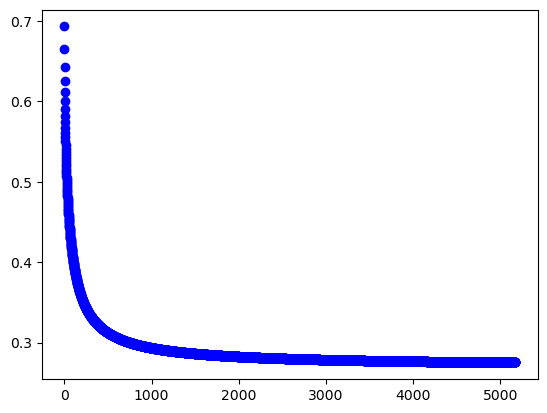

In [45]:
plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

---

The training accuracy is now much higher, as we are essentially producing a non-linear decision surface. The problem is more complex now, so it takes longer to converge.

---

Plotting your results using our old function does not work well now, as we want to plot in the original space, but our model works in the new feature space we created. We have to inform our plotting function about what kind of feature embedding (degrees, means and sigmas it should use). We update this below - once again, you can just accept this code as is.

In [49]:
def plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees, means, sigmas):    
    #Plot data
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):        
            feature, _, _ = mapFeatureAndNormalise_AllQuadTerms(x1 = np.array(u[i]), x2 = np.array(v[j]), degree = degrees, preCalcMeans = means, preCalcStd=sigmas)
            z[i, j] = sigmoid(feature.dot(w).item())

            
    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()

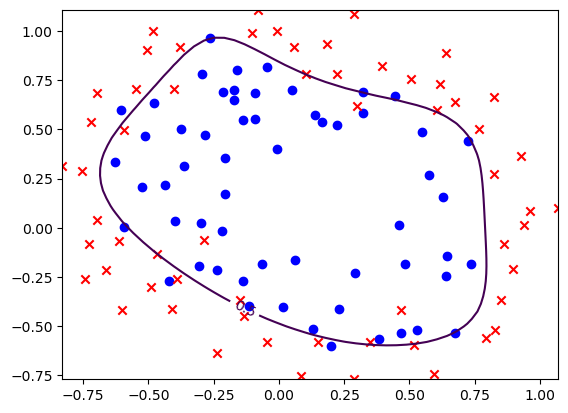

In [51]:
plotDecisionBoundary_withEmbeddedFeatures(X, y, w, deg, mu, sigma)

Now we use the code below to generate a different number of features by changing the value of `deg` and running gradient descent for different degrees.


In [54]:
deg = 15
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(features, y)

H = [classifyVector(features[i,:],w) for i in range(features.shape[0])]
print ("Training Accuracy : {0}".format(str(float(np.sum(H == y)) / y.shape[0])))

Training Accuracy : 0.9145299145299145


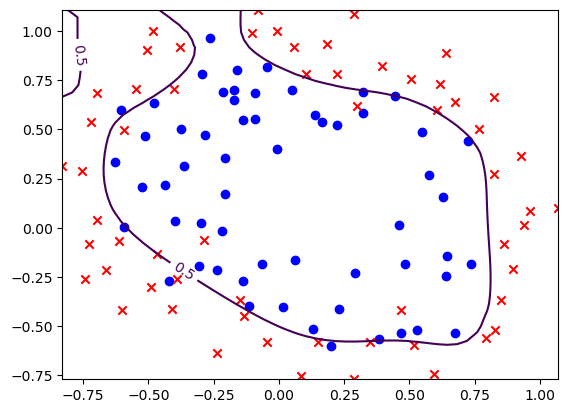

In [55]:
plotDecisionBoundary_withEmbeddedFeatures(X, y, w, deg, mu, sigma)

---

As we introduce more features, the decision surface becomes more complex, and it is able to classify correctly more and more points. But at the same time, it seems that it is eventually becoming too complex for the problem at hand...

---
